## Final Project Submission

Please fill out:
* Student name: Matthew Parker
* Student pace: full time
* Scheduled project review date/time: ????
* Instructor name: Rafael Carrasco
* Blog post URL: ????


# Importing and Inspecting

In [1]:
#let's just go ahead and import every python library in existence....just in case  :-)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import math
# plt.style.use('seaborn')

In [46]:
#reading the .csv file into a pandas dataframe
df = pd.read_csv('kc_house_data.csv')

In [47]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


It appears that two of our columns have values stored as strings. Also, three columns are missing some data.

# Cleaning the data

Check all columns for placeholders, duplicates, or other atypical values.

In [49]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000139
1825069031    0.000093
2019200220    0.000093
7129304540    0.000093
1781500435    0.000093
Name: id, dtype: float64 


date 
 6/23/2014    0.006575
6/26/2014    0.006066
6/25/2014    0.006066
7/8/2014     0.005880
4/27/2015    0.005834
Name: date, dtype: float64 


price 
 350000.0    0.007964
450000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
Name: price, dtype: float64 


bedrooms 
 3    0.454878
4    0.318655
2    0.127796
5    0.074131
6    0.012594
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248970
1.00    0.178312
1.75    0.141131
2.25    0.094782
2.00    0.089364
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006390
1400    0.006251
1440    0.006158
1660    0.005973
1010    0.005973
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016576
6000    0.013428
4000    0.011622
7200    0.010187
7500    0.005510
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494189
2.0    0.381303
1.5    

According to the reports above, we have several odd things going on:
1. There is a duplicate row in the "id" column at "795000620"
2. Over half of the "sqft_basement" column is "0.0"; additionally, 21% of all values are "?" placeholders; furthermore, the column's datatype is string instead of numeric
3. The "waterfront" column is over 99% "0.0"; this column is also missing 2,376 values (~11% of total)
4. The vast majority (90%) of values in the "view" column are "0.0"; this is in addition to 63 missing values
5. The "yr_renovated" column is 95.8% "0.0"; this column is also missing 3,842 values (~17.8% of total)

Let's deal with these one at a time, beginning with the duplicate instance of "795000620". Let's display both instances to make sure that they contain the same data.

### Dealing with duplicates

In [50]:
df.loc[df['id']==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


So it turns out that this house was sold several times over the span of a few months. This is fine, but notice that some of the columns have missing values (like 'waterfront' and 'yr_renovated'). We should probably check to make sure that the rest of the dataset doesn't have any instances of duplicates where missing values can be filled in.

In [51]:
# since we're about to slice out scattered rows, we should create a 
# new column that duplicates the original index. This will make
# merging the sliced data back in much easier later on.
df = df.reset_index()

In [52]:
duplicates = df[df.duplicated(subset='id', keep=False)]

# How many duplicates do we have?
print(len(duplicates))

353


In [53]:
# let's see if there are any houses which *only* have NaN values for 'waterfront'
duplicates.loc[duplicates['waterfront']!=0].sort_values('id')

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2494,2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,NaN,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
824,824,726049190,2/18/2015,431000.0,3,1.00,1810,7200,1.0,NaN,...,7,1130,680.0,1954,0.0,98133,47.7493,-122.351,1810,8100
17590,17590,795000620,3/11/2015,157000.0,3,1.00,1080,6250,1.0,NaN,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.330,1070,6250
10261,10261,1450100390,9/5/2014,125000.0,3,1.00,920,7314,1.0,NaN,...,6,920,0.0,1960,0.0,98002,47.2892,-122.220,1010,7420
4868,4868,1524079093,3/18/2015,369500.0,3,1.75,1300,20700,1.0,NaN,...,7,1300,0.0,1962,0.0,98024,47.5587,-121.904,1930,37638
5718,5718,1788800630,10/29/2014,96500.0,3,1.00,840,12091,1.0,NaN,...,6,840,0.0,1959,0.0,98023,47.3281,-122.343,840,9324
3536,3536,1823049202,6/10/2014,175000.0,6,1.50,1930,8400,1.0,NaN,...,7,1030,900.0,1971,0.0,98146,47.4869,-122.340,1780,9520
3947,3947,1825069031,10/16/2014,550000.0,4,1.75,2410,8447,2.0,NaN,...,8,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789
19195,19195,1901600090,4/26/2015,390000.0,5,1.75,1940,6654,1.5,NaN,...,7,1940,0.0,1953,0.0,98166,47.4663,-122.359,2300,9500
1862,1862,2143700830,10/6/2014,207000.0,4,2.50,2100,19680,1.5,NaN,...,6,2100,0.0,1914,0.0,98055,47.4787,-122.230,1340,12300


In [54]:
# let's see if there are any houses which *only* have NaN values for 'yr_renovated'
duplicates.loc[duplicates['yr_renovated']!=0].sort_values('id')

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16801,16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,0.0,...,6,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969
12406,12406,123039336,12/8/2014,244900.0,1,1.00,620,8261,1.0,0.0,...,5,620,0.0,1939,NaN,98106,47.5138,-122.364,1180,8244
14841,14841,324000530,7/8/2014,201500.0,3,1.00,1320,5000,1.5,0.0,...,7,1320,0.0,1912,NaN,98116,47.5711,-122.386,1320,4179
17590,17590,795000620,3/11/2015,157000.0,3,1.00,1080,6250,1.0,NaN,...,5,1080,0.0,1950,NaN,98168,47.5045,-122.330,1070,6250
12422,12422,1217000340,6/6/2014,185000.0,3,1.00,1840,8100,1.0,0.0,...,7,920,920.0,1953,NaN,98166,47.4550,-122.350,1250,8100
8497,8497,1237500540,12/22/2014,270000.0,3,1.75,1370,10866,1.0,0.0,...,6,1370,0.0,1945,NaN,98052,47.6774,-122.164,1580,14250
3752,3752,1254200015,12/16/2014,405000.0,3,2.50,2260,5500,1.5,0.0,...,7,1280,980.0,1910,NaN,98117,47.6810,-122.388,1790,5355
14560,14560,1432400120,11/11/2014,165000.0,3,1.00,1010,7690,1.0,0.0,...,6,1010,0.0,1958,NaN,98058,47.4501,-122.176,1010,7619
10262,10262,1450100390,3/16/2015,208000.0,3,1.00,920,7314,1.0,0.0,...,6,920,0.0,1960,NaN,98002,47.2892,-122.220,1010,7420
4867,4867,1524079093,8/27/2014,275000.0,3,1.75,1300,20700,1.0,0.0,...,7,1300,0.0,1962,NaN,98024,47.5587,-121.904,1930,37638


So looking at the duplicated data, it seems that we would be safe to convert all 'waterfront' NaN values to '0.0', except for *id*'s '2212200100', '5054800110', and '5249801440' (which only have NaN values in both instances). The same is true for all 'yr_renovated' NaN values except for *id*'s '1922059278', '1954420170', '3262300940', '4222310010', and '7972000010'.

So, first we will remove the seven pairs of rows just mentioned since we cannot reliably fill in any missing data. Then, let's replace all of the NaN values in 'waterfront' and 'yr_renovated' with '0.0'. Finally, we will merge the *duplicates* DataFrame back into the original *df* DataFrame so that our changes are updated to the original.

In [55]:
# change index to 'id' so that we can tell pandas which rows to remove
duplicates = duplicates.set_index('id')
duplicates.drop([2212200100, 5054800110, 5249801440, 1922059278, 1954420170, 
                 3262300940, 4222310010, 7972000010], inplace=True)

# now reset the index to preserve the 'id' column, then set the index back
# to 'index' for merging with the original DataFrame
duplicates = duplicates.reset_index()
duplicates = duplicates.set_index('index')

In [56]:
# now replace all of the NaN values in 'waterfront' and 'yr_renovated' with '0.0'
duplicates.waterfront.fillna(0, inplace=True)
duplicates.yr_renovated.fillna(0, inplace=True)

In [57]:
# Now let's merge the duplicates DataFrame back into the original.
# first set df's index back to 'index' as it originally was.
df.set_index('index', inplace=True)
df.update(duplicates, overwrite=True)

# because pandas converts all integers to floats in an update, we need to set them back
df = df.astype({'id': 'int64', 'bedrooms': 'int64', 'sqft_living': 'int64', 'sqft_lot': 'int64', 
                  'condition': 'int64', 'grade': 'int64', 'sqft_above': 'int64', 'yr_built': 'int64', 
                  'zipcode': 'int64', 'sqft_living15': 'int64', 'sqft_lot15': 'int64'})

Alright, that's 1 down, only 4 more weird features to go. 

### Changing datatypes 

Convert the values in the *date* column to the *datetime* datatype.

In [58]:
df.date = pd.to_datetime(df.date)

Let's tackle the problematic "sqft_basement" column next. First, we'll turn all the "?" values into NaN values. Then we'll convert the entire column into numeric data using the *.to_numeric* method.

In [59]:
# we define a function that will replace all "?" values with NaN
def impute_sqft_basement(value):
    if value == '?':
        return None
    else:
        return value

# now we map a lamba function to iterate the above "impute" function through
# the *sqft_basement* column
df.sqft_basement = df.sqft_basement.map(lambda x: impute_sqft_basement(x))

In [60]:
# and now we will change the data type to numeric
df.sqft_basement = pd.to_numeric(df.sqft_basement)

Okay, that's another weird column dealt with. 

### Missing values

How about the *waterfront* and *yr_renovated* columns? Since both column are missing over 10% of their data *and* around 95-99% of the known values are identical, it should be safe to exclude these variables from our model. The values for the variable *view* are also 90% identical, so let's drop it as well.

In [127]:
# create a new dataframe labeled as a subset of the original, then use the *.drop* method
df_subset = df.drop(['waterfront', 'yr_renovated', 'view'], axis=1)

OK, now we just have left the missing values in *sqft_basement* to contend with. About 60% of the properties have no basement and there are 454 NaN values. Intuitively, it seems like the presence/absence of a basement is likely to impact the sale price of a home, so instead of dropping the column let's just drop the rows with NaN values instead. This is only 2% of our dataset, so our model should not be significantly effected.

Furthermore, since any values for *sqft_basement* should just be the difference between *sqft_living* and *sqft_above* (or close to it), the actual values in this column are not as important. Since over half of the houses don't have a basement anyway, let's turn this column into a categorical one that just tells us whether or not a house has a basement at all.

In [128]:
# getting rid of NaN values
df_subset.dropna(subset=['sqft_basement'], inplace=True)

# changing all positive values to "1"
# we can just reuse and slightly change our 'impute' function from above
def impute_sqft_basement_again(value):
    if value > 0:
        return 1
    else:
        return value


df_subset.sqft_basement = df_subset.sqft_basement.map(lambda x: impute_sqft_basement_again(x))

# rename the column to make it more informative
# and also make it an integer instead of a float
df_subset.rename(columns={'sqft_basement':'basement'}, inplace=True)
df_subset = df_subset.astype({'basement': 'int64'})

Let's go ahead and drop *zipcode* from our *df_subset* DataFrame since it is an arbitrary value denoting location that can also be handled by the *lat* and *long* categories. Also, let's drop *id* and *date* as well since they are not really variables, but rather identifiers (also, we have not covered timeseries interpretation yet).

In [129]:
df_subset.drop(['zipcode', 'id', 'date'], axis=1, inplace=True)

## Variable Correlation


Now that our data has been sufficiently cleaned, let's get a look at our variables and whether they might be related.

*Warning*: this will take a while to compute due to the size of the data set.


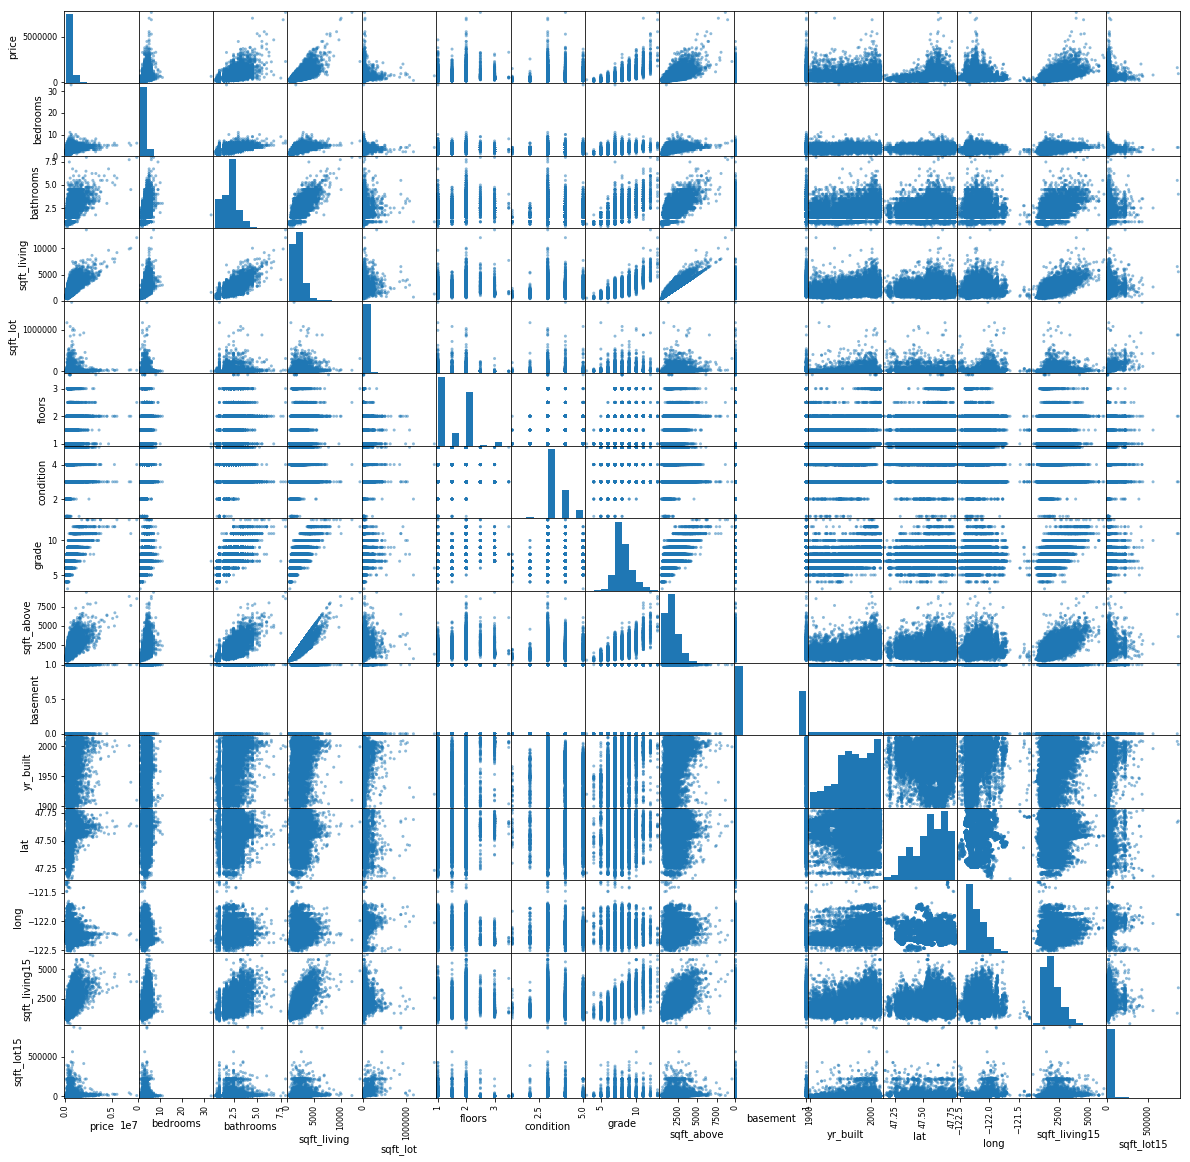

In [20]:
# let's use a scatter matrix to take a quick look at the variables
# end code line with a semicolon so that only the graph is displayed
pd.plotting.scatter_matrix(df_subset, figsize=(20,20));

Wow, that's a lot of tiny graphs! But we can immediately discern a few important characteristics:
1. We seem to have several variables with categorical data: *floors*, *condition*, and *grade* for sure. Logically, *bathrooms* and *bedrooms* would also be categorical, but it seems we may have an outlier in *bedrooms* and *floors*.
2. Looking at the relations with the *price* variable, we have several candidates for linear relationships: *bedrooms*, *bathrooms*, *sqft_living*, *sqft_above*, and *sqft_living15*
3. Heavily left-skewed distribution: *price*, *bedrooms*, *sqft_living*, *sqft_above*, *sqft_living15*, *long*
4. somewhat normally distributed: *bathrooms*, *grade*
5. *zipcode* shows a rather random distribution, so we can probably safely drop it

Let's check out our potential categorical variables more closely

In [130]:
cats = ['floors','condition', 'grade', 'bathrooms', 'bedrooms']
for cat in cats:
    print(df_subset[cat].value_counts(normalize=False))

1.0    10456
2.0     8066
1.5     1865
3.0      593
2.5      156
3.5        7
Name: floors, dtype: int64
3    13726
4     5557
5     1666
2      166
1       28
Name: condition, dtype: int64
7     8788
8     5933
9     2557
6     1997
10    1112
11     391
5      235
12      89
4       27
13      13
3        1
Name: grade, dtype: int64
2.50    5255
1.00    3757
1.75    2991
2.25    2014
2.00    1886
1.50    1422
2.75    1160
3.00     736
3.50     719
3.25     574
3.75     152
4.00     135
4.50      96
4.25      79
0.75      71
4.75      23
5.00      19
5.25      13
1.25       9
5.50       9
6.00       6
5.75       4
0.50       3
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64
3     9639
4     6740
2     2691
5     1560
6      262
1      191
7       36
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


#### Outliers

Wow, so it seems like most of these categories have some extreme outliers. We can probably drop any category that appears less than around 20 times.

In [131]:
# dropping grade outliers
indexNames = df_subset[df_subset['grade'] == 13 ].index
df_subset.drop(indexNames , inplace=True)
indexNames = df_subset[df_subset['grade'] == 3 ].index
df_subset.drop(indexNames , inplace=True)

# dropping bedroom outliers
indexNames = df_subset[df_subset['bedrooms'] >= 8 ].index
df_subset.drop(indexNames , inplace=True)

# dropping bathroom outliers
# we will group fractions of bathrooms together later
indexNames = df_subset[df_subset['bathrooms'] >= 6 ].index
df_subset.drop(indexNames , inplace=True)

# dropping floor outliers
indexNames = df_subset[df_subset['floors'] == 3.5 ].index
df_subset.drop(indexNames , inplace=True)

#### Dropping *price* outliers

We should also get rid of the crazy-expensive houses. Let's try keeping everything within 7 standard deviations of the mean (so as not to eliminate *too* much data.

In [132]:
print('mean = ', df_subset.price.mean())
print('std = ', df_subset.price.std())
up_lim = (df_subset.price.mean() + (7*df_subset.price.std()))
print('upper limit of our concern = ', up_lim)

mean =  536944.4618266312
std =  351023.0207416306
upper limit of our concern =  2994105.6070180456


In [133]:
# dropping price outliers based on 
indexNames = df_subset[df_subset['price'] > up_lim].index
df_subset.drop(indexNames , inplace=True)

### Taking a closer look at *floors* and *bathrooms*
We know that *floors* and *bathrooms* exhibit some weird chunkiness, but let's take a closer look at their distributions. 

Text(0.5, 1.0, 'bathrooms')

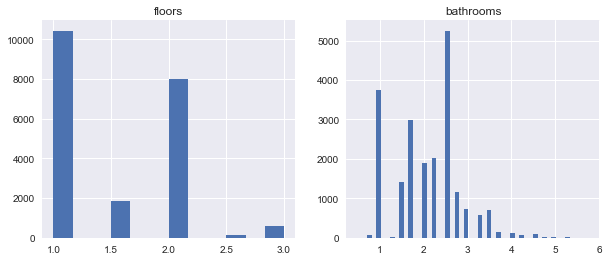

In [134]:
# plotting two histograms
plt.figure(figsize=(10,4))

ax1 = plt.subplot(1,2,1)
df_subset.floors.hist(bins=12)
ax1.set_title("floors")

ax2 = plt.subplot(1,2,2)
df_subset.bathrooms.hist(bins=50)
ax2.set_title('bathrooms')

Gross. We need to clean that up a little bit.

Since there are a lot of half and quarter (just sinks? just toilets? just showers?) bathrooms, we'll just round every value down to an integer (1.75 intentionally rounds down to 1). It's just a hunch, but it seems like the number of full bathrooms might be more important than the number of partial bathrooms.

We'll go through a similar routine for *floors*, but this time we'll round everything up (1.5 rounds up to 2). Again, just a hunch, but this is based on the assumption that potential buyers would assign similar weights to both full- and half-flights of stairs.

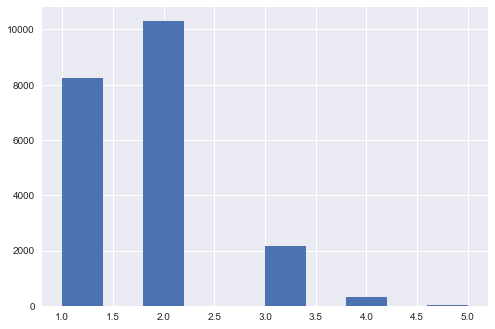

In [135]:
#grouping bathrooms
new_bath = []
for i in df_subset.bathrooms:
    if i >= 1:
        new_bath.append(math.trunc(i))
    else:
        new_bath.append(1)    
df_subset.bathrooms = new_bath
df_subset.bathrooms.hist(bins=10);

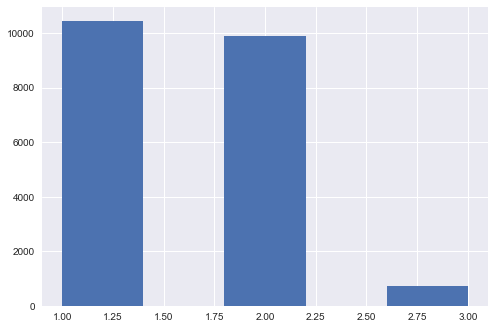

In [136]:
#grouping floors
new_floor = []
for i in df_subset.floors:
    new_floor.append(math.ceil(i))
df_subset.floors = new_floor
df_subset.floors.hist(bins=5);

### Looking at variable correlation

Now that we've seen that several of the variables display relationships, and that several independent variables might be related, let's use a correlation heatmap to filter out which ones are related the closest.

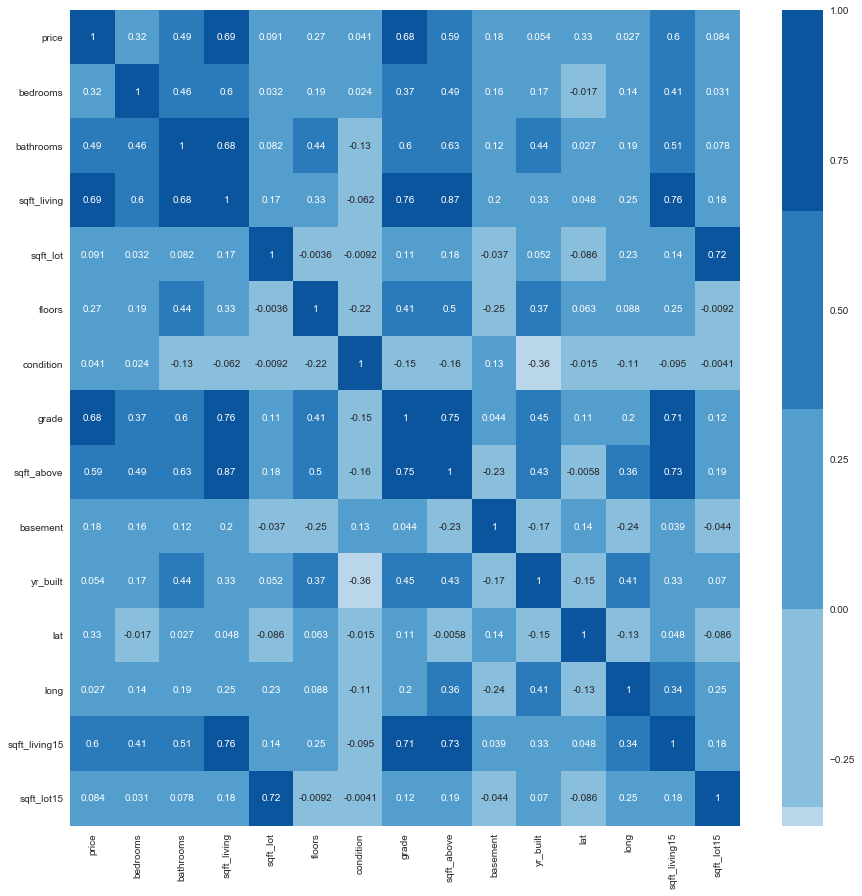

In [137]:
plt.figure(figsize=(15,15))
sns.heatmap(df_subset.corr(), annot=True, cmap=sns.color_palette('Blues'), center=0);

It appears that *sqft_lot*, *condition*, *yr_built*, and *sqft_lot15* are each correlated to price by less than 10%, so let's go ahead and drop those.  We'll keep *long* for now since it is likely related to *lat* in some way.

In [138]:
df_subset.drop(['sqft_lot', 'condition', 'yr_built', 'sqft_lot15'], axis=1, inplace=True)

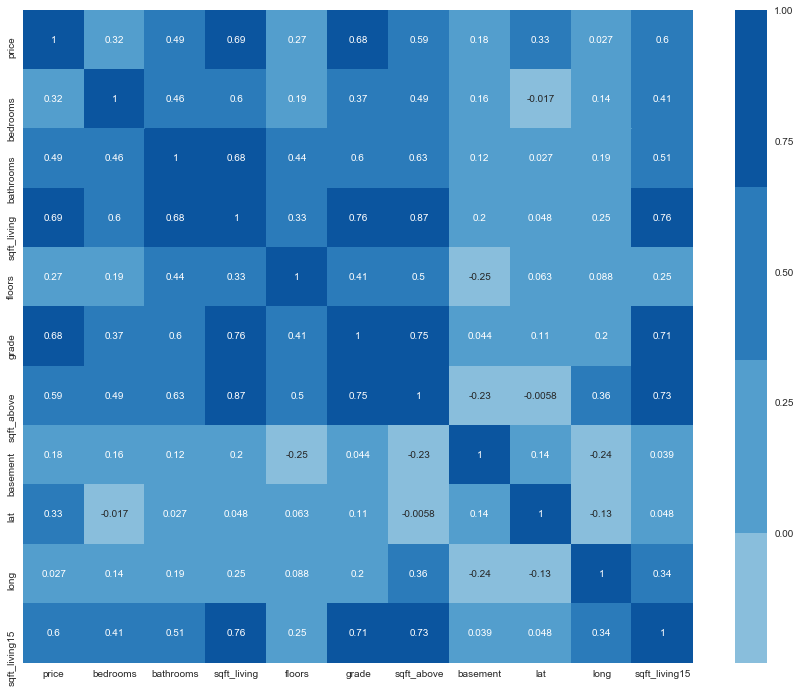

In [139]:
# cleaned up heatmap again
plt.figure(figsize=(15,12))
sns.heatmap(df_subset.corr(), annot=True, cmap=sns.color_palette('Blues'), center=0);

We also seem to have numerous candidates for multicolinearity. Rather than addressing them all right now, let's see if we can pare down our list of variables first. Use *statsmodels* to see which variables have the highest *p-values*.

In [140]:
# split the dependent variable 'price' from the rest of the data
y = df_subset['price']
x = df_subset.drop(['price'], axis=1)

# now establish a constant for our model
X = sm.add_constant(x)

# now run an Ordinary Least Squares model
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     3617.
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        13:10:59   Log-Likelihood:            -2.8651e+05
No. Observations:               21050   AIC:                         5.730e+05
Df Residuals:                   21039   BIC:                         5.731e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.727e+07   1.37e+06    -49.269      0.000   -6.99e+07   -6.46e+07
bedrooms      -3.011e+04   1969.016    -15.292      0.000    -3.4e+04   -2.63e+04
bathrooms       1.47e+04   2815.198      5.220      0.000    9177.859    2.02e+04
sqft_living     176.0903      6.182     28.486      0.000     163.974     188.207
floors        -5876.1432   3093.338     -1.900      0.057   -1.19e+04     187.037
grade           7.76e+04   2063.396     37.610      0.000    7.36e+04    8.16e+04
sqft_above      -24.0003      6.788     -3.536      0.000     -37.305     -10.696
basement      -4006.7520   5247.953     -0.763      0.445   -1.43e+04    6279.639
lat            5.978e+05   1.01e+04     59.153      0.000    5.78e+05    6.18e+05
long          -3.142e+05   1.09e+04    -28.864      0.000   -3.36e+05   -2.93e+05
sqft_living15    67.4522      3.402     19.830      0.000      60.785      74.119
==============================================================================
Omnibus:                    10870.103   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           130163.942
Skew:                           2.211   Prob(JB):                         0.00
Kurtosis:                      14.351   Cond. No.                     3.62e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From this initial summary we can see that pretty much all of the variables have good *p-value* scores. Although *floors* and *basement* are above the 0.05 threshold, we'll keep them for now since it seems like it might relate to either *sqft_* or *bedrooms*.

Also, our *skew* and *kurtosis* scores are pretty awful, but we'll tackle them later.

Now that we've whittled down our variables a bit, let's take another look at their scatter plots using a *scatter_matrix*.

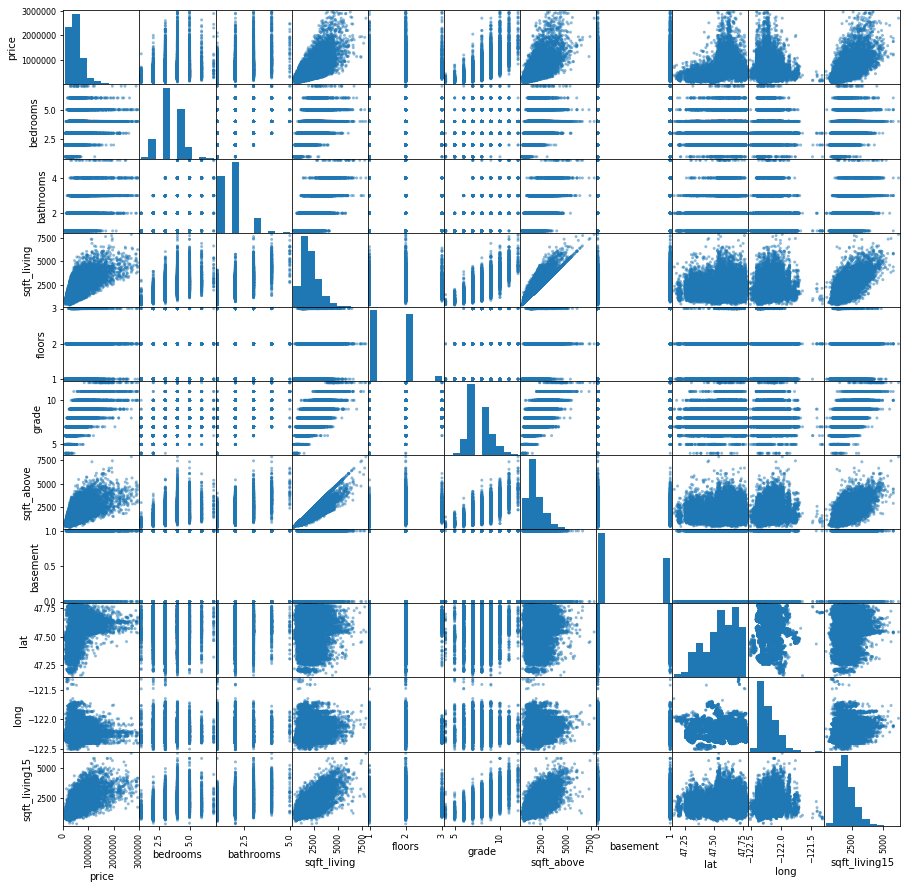

In [32]:
pd.plotting.scatter_matrix(df_subset, figsize=(15,15));

So much nicer! And it appears that half of our remaining variables are categorical in nature, given the vertical/horizontal striations. 
Let's check to see if any of our variables have normally distributed residuals (and thus are likely to have a linear relationship).

## Checking for normality

One of the easiest ways to check a variable for normality of distribution is to do a *Q-Q Plot*. 

bedrooms
bathrooms
sqft_living
grade
sqft_above
sqft_living15
floors
lat
long
basement


C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


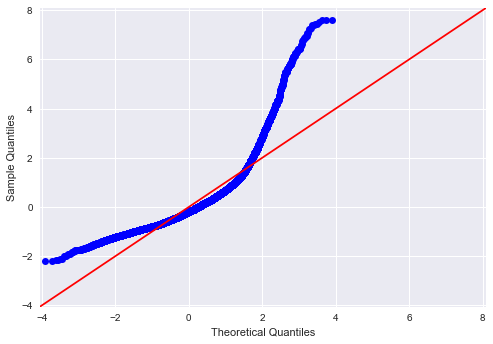

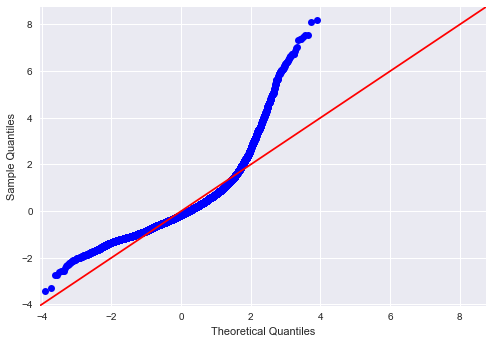

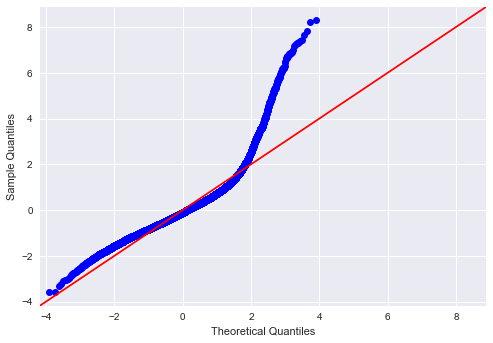

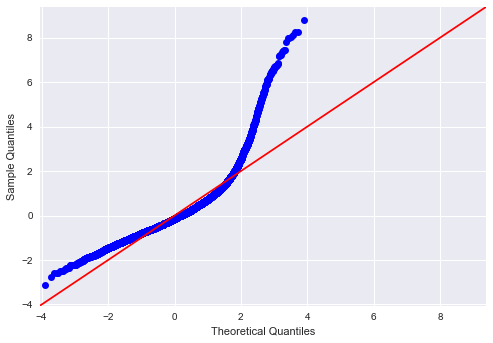

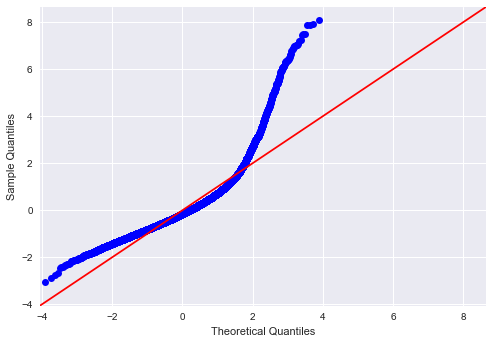

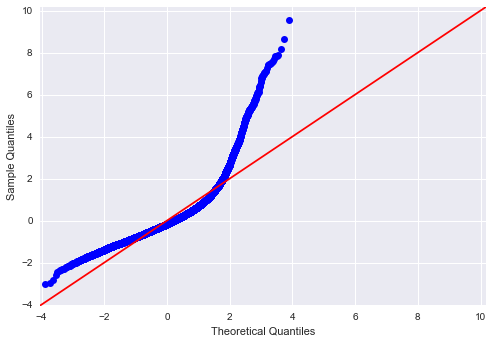

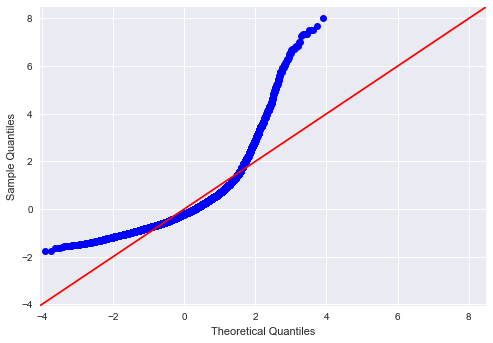

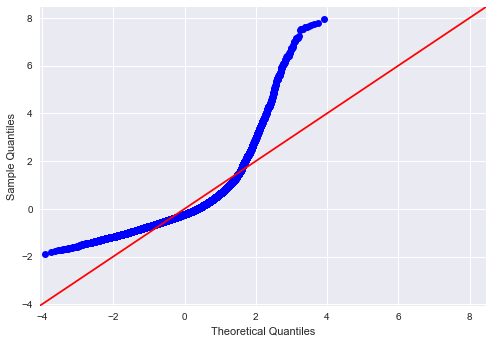

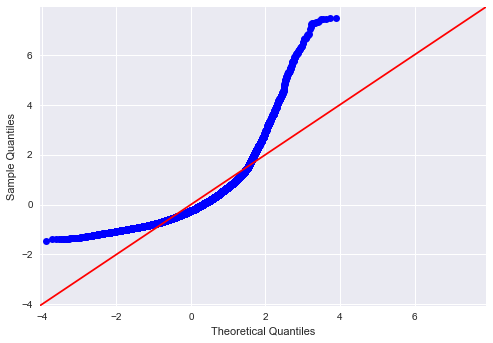

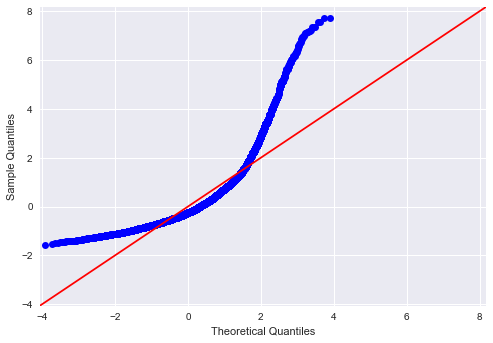

In [141]:
#define the formulas
columns = ['bedrooms','bathrooms','sqft_living','grade','sqft_above',
           'sqft_living15','floors','lat','long','basement']
for col in columns:
    f = str('price~'+col)
    model = smf.ols(formula=f, data=df_subset).fit()
    resid = model.resid
    fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)
    print(col)
fig.show()

It would appear that none of our variables are normally distributed. These *Q-Q Plots* suggest that the residuals of each variable are heavily right-skewed. This means that we do *not* have any linear relationships.

# Categorical Data

In this dataset we don't really have any *true* categorical data (there are no abstract concepts as values; everything is on a numerical scale). The closest thing we have to abstract values would be the *lat* and *long* GPS coordinates. Though not truly categorical, non-numerical geographical and legal features (lakes, mountains, zoning restrictions, etc.) heavily influence the distribution of these values. 

### *lat* & *long*

But what about the *lat* and *long* data? Let's check out their histograms.

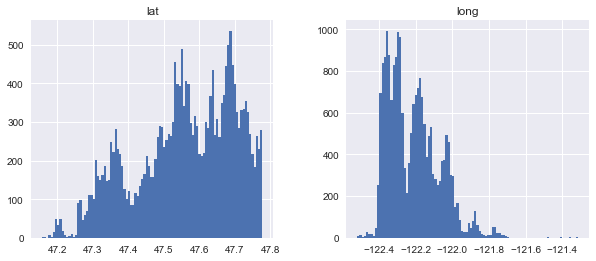

In [142]:
df_subset.hist(column=['lat','long'], bins=100, figsize=(10,4));

#### hexbins

The distribution is somewhat erratic, though there are hints of a more normal distribution underlying the irregularities. Let's use **hexbins** to see what this looks like in 2D.

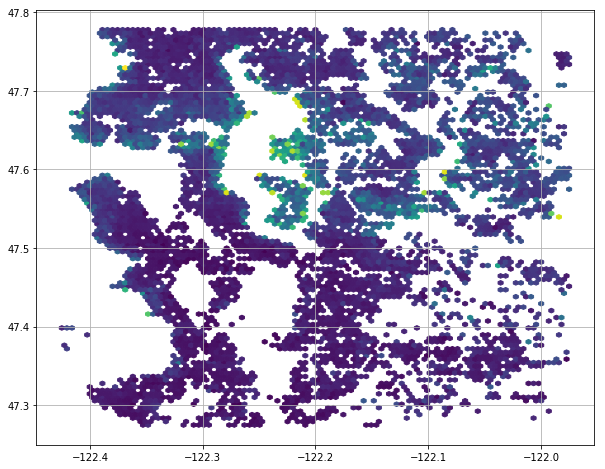

In [109]:
plt.figure(figsize=(10,8))
plt.grid()
plt.hexbin(df_subset.long, df_subset.lat, C=df_subset.price)
plt.show()

A quick look at Seattle on a map ( https://www.google.com/maps/@47.5285014,-122.3593406,10.36z ) shows that there are mountains, islands, and lakes scattered throughout this region. Let's narrow our dataset a bit to get rid of the outlier houses.

How about we cut out anything East of -121.975, anything West of -122.425, and anything South of 47.275. That won't make it perfect, but it should at least eliminate properties in the mountains or ones only accessible by ferries.

In [143]:
indexNames = df_subset[df_subset['long'] > -121.975 ].index
df_subset.drop(indexNames , inplace=True)
indexNames = df_subset[df_subset['long'] < -122.425 ].index
df_subset.drop(indexNames , inplace=True)
indexNames = df_subset[df_subset['lat'] < 47.275 ].index
df_subset.drop(indexNames , inplace=True)

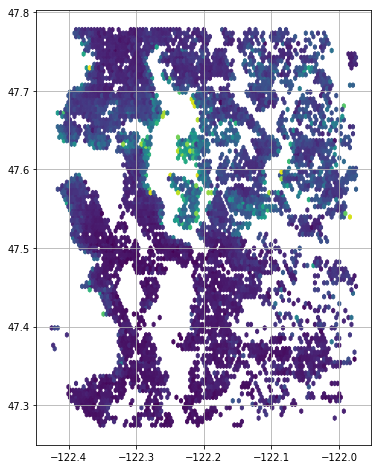

In [110]:
plt.figure(figsize=(6,8))
plt.grid()
plt.hexbin(df_subset.long, df_subset.lat, C=df_subset.price)
plt.show()

This looks better, but there's not much more that we can do with it without better observations. The *waterfront* variable would have been useful if half of the observations weren't missing. As such, we'll just have to refer realtors (or whoever is using this data) to this map to take it into account when looking at pricing of houses.

In terms of our model, however, we can now safely remove these two GPS variables from our data subset.

In [144]:
# saving our processed GPS data as another DataFrame in case
# we would like to call upon it at some point later
df_subset_gps = df_subset[['price','lat','long']]

#removing 'lat' and 'long' from our dataset
df_subset.drop(['lat','long'], axis=1, inplace=True)
df_subset.head()

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,basement,sqft_living15
index,,,,,,,,,
0,221900.0,3,1,1180,1,7,1180,0,1340
1,538000.0,3,2,2570,2,7,2170,1,1690
2,180000.0,2,1,770,1,6,770,0,2720
3,604000.0,4,3,1960,1,7,1050,1,1360
4,510000.0,3,2,1680,1,8,1680,0,1800


In [145]:
# We can also make our graphs look prettier now
plt.style.use('seaborn')

# Normalizing, standardizing, scaling, etc.

We still need to tweak *sqft_living*, *sqft_above*, and *sqft_living15* to make them a bit more manageable. Let's look at how correlated these variables might be, and then try a variety of standardization methods.

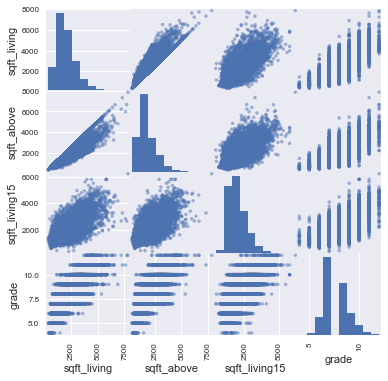

In [146]:
df_sub_cont = df_subset[['sqft_living','sqft_above','sqft_living15', 'grade']]
pd.plotting.scatter_matrix(df_sub_cont,figsize  = [6, 6]);

It would appear that all four of our continuous data variables display multicollinearity (i.e. are related to one another). Additionally, their histograms all appear to be skewed to the left (except *grade*), so perhaps doing a log transformation will make them look more normally distributed.

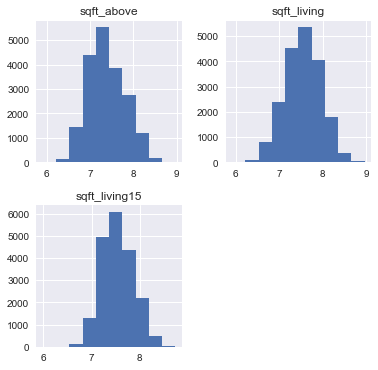

In [147]:
# creating a new DataFrame for log-transformations
df_sub_log = pd.DataFrame([])
df_sub_log['sqft_living'] = np.log(df_sub_cont['sqft_living'])
df_sub_log['sqft_above'] = np.log(df_sub_cont['sqft_above'])
df_sub_log['sqft_living15'] = np.log(df_sub_cont['sqft_living15'])
df_sub_log.hist(figsize  = [6, 6]);

Good. Now let's standardize these variables. Given the normal distribution, perhaps *mean normalization* would be worthwhile.

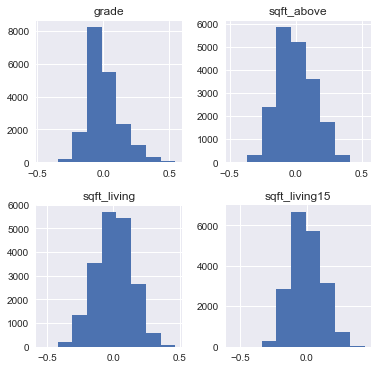

In [148]:
df_sub_log_scaled = pd.DataFrame([])
for column in df_sub_log.columns:
    G = df_sub_log[column]
    df_sub_log_scaled[column] = (G-np.mean(G)) / (max(G)-min(G))

# and doing the same for 'grade'
G = df_subset['grade']
df_sub_log_scaled['grade'] = (G-np.mean(G)) / (max(G)-min(G))

df_sub_log_scaled.hist(bins=9, figsize  = [6, 6]);

Now plug this data back into our *df_subset* DataFrame.

In [149]:
for column in df_sub_log_scaled.columns:
    df_subset[column] = df_sub_log_scaled[column]

df_subset.head()

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,basement,sqft_living15
index,,,,,,,,,
0,221900.0,3,1,-0.153367,1,-0.081044,-0.100230,0,-0.121234
1,538000.0,3,2,0.101445,2,-0.081044,0.099200,1,-0.036694
2,180000.0,2,1,-0.293109,1,-0.206044,-0.239972,0,0.136680
3,604000.0,4,3,0.012744,1,-0.081044,-0.138441,1,-0.115837
4,510000.0,3,2,-0.037719,1,0.043956,0.015419,0,-0.013722


Now let's build a linear regression model again and see what we have.

In [150]:
y = df_subset['price']
x = df_subset.drop('price', axis=1)
X = sm.add_constant(x)
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     2583.
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        13:12:01   Log-Likelihood:            -2.6881e+05
No. Observations:               19525   AIC:                         5.376e+05
Df Residuals:                   19516   BIC:                         5.377e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.024e+05    1.1e+04     45.712      0.000    4.81e+05    5.24e+05
bedrooms      -1.891e+04   2505.054     -7.548      0.000   -2.38e+04    -1.4e+04
bathrooms      2.992e+04   3326.846      8.994      0.000    2.34e+04    3.64e+04
sqft_living    2.627e+05    5.1e+04      5.151      0.000    1.63e+05    3.63e+05
floors         5120.5641   3732.501      1.372      0.170   -2195.457    1.24e+04
grade          9.997e+05   1.95e+04     51.244      0.000    9.61e+05    1.04e+06
sqft_above      1.76e+05   5.09e+04      3.458      0.001    7.62e+04    2.76e+05
basement        9.61e+04   6986.450     13.756      0.000    8.24e+04     1.1e+05
sqft_living15  3.291e+05   2.25e+04     14.596      0.000    2.85e+05    3.73e+05
==============================================================================
Omnibus:                     8949.846   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79457.193
Skew:                           1.995   Prob(JB):                         0.00
Kurtosis:                      12.041   Cond. No.                         183.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Now to start addressing multicollinearity!

So let's examine our continuous data first for potential collinearity. We can do this easily using a heatmap to display the pairwise correlation scores between the variables.

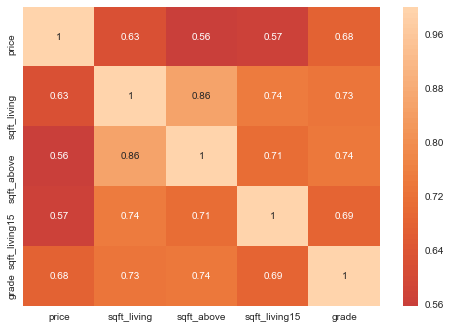

In [152]:
# slice just the variables we want to compare
df_sub_continuous = df_subset[['price','sqft_living','sqft_above','sqft_living15','grade']]

# make a heatmap of the correlation
sns.heatmap(df_sub_continuous.corr(), center=0, annot=True);

It looks like they are all pretty heavily correlated. 

### Building a feature builder

Let's build a function that can take in two variables, a target ('price'), and a dataset to create a feature for our dataset, outputting a column of coefficients to our dataset for the new feature.

In [153]:
# building a feature building function. what fun!
def feature_builder(var_1, var_2, target, dataset):
    """
    Parameters :
    ------------
    var_1 : column name of first potentially correlated variable
    var_2 : column name of second potentially correlated variable
    target : column name of target variable
    dataset : name of pandas DataFrame
    
    
    """    
    weights = np.linspace(0, 1, 10000)
    max_corr = -1
    best_weights = None
    corrs = []
    
    for index, weight in enumerate(weights):
        w1 = weight # get the first weight value
        w2 = 1 - weight # get the second weight value
        vals = w1*dataset[var_1] + w2*dataset[var_2] # create a linear combination of the columns
        corr_coeff = np.abs(np.corrcoef(vals, dataset[target]))[0][1] # get the corrcoeff with the target
        
        # if the corr_coeff is larger than the max, store the weights and change the max
        if corr_coeff > max_corr:
            best_weights = [w1, w2]
            max_corr = corr_coeff
            
        # store the correlation coefficients to a list
        corrs.append(corr_coeff)  
        
    # output the desired weights
    print('weight for [',var_1,'] : weight for [',var_2,']\n', best_weights)
    feat_label = str(var_1+'_'+var_2+'_feature')
    print('feature name : ', feat_label)
    dataset[feat_label] = w1*dataset[var_1] + w2*dataset[var_2]
    pass

In [154]:
# now to run the function on our small dataset
feature_builder('grade','sqft_living','price',df_sub_continuous)

weight for [ grade ] : weight for [ sqft_living ]
 [0.6213621362136214, 0.37863786378637865]
feature name :  grade_sqft_living_feature


C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Adding complexity

Since all three of our continuous data variables are pretty correlated, let's got through another iteration of feature building that weighs our first feature against the other remaining continuous data variable *sqft_living15*.

In [155]:
# same as before, but using the name of the new feature as var_1
feature_builder('grade_sqft_living_feature','sqft_living15','price',df_sub_continuous)

weight for [ grade_sqft_living_feature ] : weight for [ sqft_living15 ]
 [0.6941694169416942, 0.3058305830583058]
feature name :  grade_sqft_living_feature_sqft_living15_feature


C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [156]:
# same as before, but using the name of the new feature as var_1
feature_builder('grade_sqft_living_feature_sqft_living15_feature','sqft_above','price',df_sub_continuous)

weight for [ grade_sqft_living_feature_sqft_living15_feature ] : weight for [ sqft_above ]
 [0.8237823782378239, 0.17621762176217615]
feature name :  grade_sqft_living_feature_sqft_living15_feature_sqft_above_feature


C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [157]:
# let's take a look at our new and improved small dataset
df_sub_continuous.head()

,price,sqft_living,sqft_above,sqft_living15,grade,grade_sqft_living_feature,grade_sqft_living_feature_sqft_living15_feature,grade_sqft_living_feature_sqft_living15_feature_sqft_above_feature
index,,,,,,,,
0,221900.0,-0.153367,-0.100230,-0.121234,-0.081044,-0.081044,-0.081044,-0.081044
1,538000.0,0.101445,0.099200,-0.036694,-0.081044,-0.081044,-0.081044,-0.081044
2,180000.0,-0.293109,-0.239972,0.136680,-0.206044,-0.206044,-0.206044,-0.206044
3,604000.0,0.012744,-0.138441,-0.115837,-0.081044,-0.081044,-0.081044,-0.081044
4,510000.0,-0.037719,0.015419,-0.013722,0.043956,0.043956,0.043956,0.043956


#### Evaluating our new features

Now that we've created two potentially useful features, let's see how they might effect our model. To do so, we'll run three OLS models and compare their scores.

In [159]:
y = df_sub_continuous['price']

# original variables, untouched
x1 = df_sub_continuous[['sqft_living','sqft_above','sqft_living15','grade']]

# our first feature with the remaining original variables
x2 = df_sub_continuous[['sqft_above','sqft_living15','grade_sqft_living_feature']]

# our second feature with the remaining original variables
x3 = df_sub_continuous[['sqft_above','grade_sqft_living_feature_sqft_living15_feature']]

#our third feature with only 'bedrooms' remaining separate
x4 = df_sub_continuous[['grade_sqft_living_feature_sqft_living15_feature_sqft_above_feature']]

X1 = sm.add_constant(x1)
X2 = sm.add_constant(x2)
X3 = sm.add_constant(x3)
X4 = sm.add_constant(x4)

# modeling and summarizing the first option (original)
linreg = sm.OLS(y, X1).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     4978.
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        13:13:40   Log-Likelihood:            -2.6899e+05
No. Observations:               19525   AIC:                         5.380e+05
Df Residuals:                   19520   BIC:                         5.380e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           5.38e+05   1666.253    322.851      0.000    5.35e+05    5.41e+05
sqft_living    7.811e+05    2.6e+04     30.079      0.000     7.3e+05    8.32e+05
sqft_above     -3.64e+05    2.5e+04    -14.578      0.000   -4.13e+05   -3.15e+05
sqft_living15  3.017e+05   2.23e+04     13.556      0.000    2.58e+05    3.45e+05
grade          1.103e+06   1.87e+04     59.090      0.000    1.07e+06    1.14e+06
==============================================================================
Omnibus:                     9132.108   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83657.238
Skew:                           2.035   Prob(JB):                         0.00
Kurtosis:                      12.288   Cond. No.                         19.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
# modeling and summarizing the second option (midway point)
linreg = sm.OLS(y, X2).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     6055.
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        13:13:49   Log-Likelihood:            -2.6944e+05
No. Observations:               19525   AIC:                         5.389e+05
Df Residuals:                   19521   BIC:                         5.389e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       5.38e+05   1704.386    315.627      0.000    5.35e+05    5.41e+05
sqft_above                 9.741e+04   2.02e+04      4.833      0.000    5.79e+04    1.37e+05
sqft_living15              5.086e+05   2.17e+04     23.486      0.000    4.66e+05    5.51e+05
grade_sqft_living_feature  1.206e+06   1.88e+04     64.257      0.000    1.17e+06    1.24e+06
==============================================================================
Omnibus:                     8986.304   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79270.134
Skew:                           2.008   Prob(JB):                         0.00
Kurtosis:                      12.017   Cond. No.                         14.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
# modeling and summarizing the third option (fully combined)
linreg = sm.OLS(y, X3).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     8565.
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        13:13:52   Log-Likelihood:            -2.6971e+05
No. Observations:               19525   AIC:                         5.394e+05
Df Residuals:                   19522   BIC:                         5.394e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                             5.38e+05   1728.254    311.268      0.000    5.35e+05    5.41e+05
sqft_above                                       2.902e+05   1.87e+04     15.551      0.000    2.54e+05    3.27e+05
grade_sqft_living_feature_sqft_living15_feature  1.357e+06   1.79e+04     75.883      0.000    1.32e+06    1.39e+06
==============================================================================
Omnibus:                     9027.025   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77934.172
Skew:                           2.027   Prob(JB):                         0.00
Kurtosis:                      11.908   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
linreg = sm.OLS(y, X4).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                 1.668e+04
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        13:13:57   Log-Likelihood:            -2.6983e+05
No. Observations:               19525   AIC:                         5.397e+05
Df Residuals:                   19523   BIC:                         5.397e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
const                                                                5.38e+05   1738.881    309.366      0.000    5.35e+05    5.41e+05
grade_sqft_living_feature_sqft_living15_feature_sqft_above_feature  1.563e+06   1.21e+04    129.161      0.000    1.54e+06    1.59e+06
==============================================================================
Omnibus:                     9108.204   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79767.602
Skew:                           2.045   Prob(JB):                         0.00
Kurtosis:                      12.018   Cond. No.                         6.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation

Looking at these summaries in sequence, it seems that the **F-statistic**, **Skew**, **Kurtosis**, and **Cond. No.** have all consistently improved as we progressed through this process, even though the last iteration slightly increased the skew and kurtosis. Our **R-squared** score has fallen a little bit, but that's to be expected when getting rid of multicollinearity. 

### Plugging this back into the larger dataset

In [163]:
df_subset['grade_sqft_living_feature_sqft_living15_feature_sqft_above_feature'] = df_sub_continuous['grade_sqft_living_feature_sqft_living15_feature_sqft_above_feature']

# since we're about to remove columns, let's create a new DataFrame
df_sub_feats = df_subset.drop(['sqft_living','sqft_above','sqft_living15','grade'], axis=1)
df_sub_feats.head()

,price,bedrooms,bathrooms,floors,basement,grade_sqft_living_feature_sqft_living15_feature_sqft_above_feature
index,,,,,,
0,221900.0,3,1,1,0,-0.081044
1,538000.0,3,2,2,1,-0.081044
2,180000.0,2,1,1,0,-0.206044
3,604000.0,4,3,1,1,-0.081044
4,510000.0,3,2,1,0,0.043956


In [164]:
y = df_sub_feats['price']

# original variables, untouched
x = df_sub_feats.drop('price', axis=1)

X = sm.add_constant(x)

# modeling and summarizing the first option (original)
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     3796.
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        13:14:45   Log-Likelihood:            -2.6923e+05
No. Observations:               19525   AIC:                         5.385e+05
Df Residuals:                   19519   BIC:                         5.385e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================================================================
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------
const                                                               3.689e+05   8838.479     41.734      0.000    3.52e+05    3.86e+05
bedrooms                                                            1.134e+04   2174.077      5.218      0.000    7082.570    1.56e+04
bathrooms                                                           5.035e+04   3282.896     15.337      0.000    4.39e+04    5.68e+04
floors                                                              4097.8860   3579.241      1.145      0.252   -2917.733    1.11e+04
basement                                                            9.069e+04   3699.313     24.517      0.000    8.34e+04    9.79e+04
grade_sqft_living_feature_sqft_living15_feature_sqft_above_feature   1.37e+06    1.5e+04     91.174      0.000    1.34e+06     1.4e+06
==============================================================================
Omnibus:                     8945.361   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77363.349
Skew:                           2.004   Prob(JB):                         0.00
Kurtosis:                      11.890   Cond. No.                         41.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Oddly enough, it seems that *floors* has become a much less reliable predictor based on its **p-value** score. Meanwhile, *basement* has become much more reliable. So let's drop *floors* and then examine the heatmap.

In [166]:
df_sub_feats.drop('floors', axis=1, inplace=True)

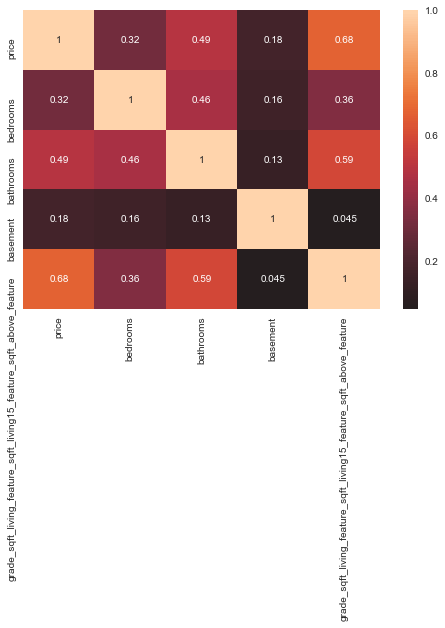

In [168]:
sns.heatmap(df_sub_feats.corr(), center=0, annot=True);

It appears that there is likely some multicollinearity going on between *bedrooms*, *bathrooms*, and *floors*. Let's run them through the same feature-building process that we did with the other collinear variables.

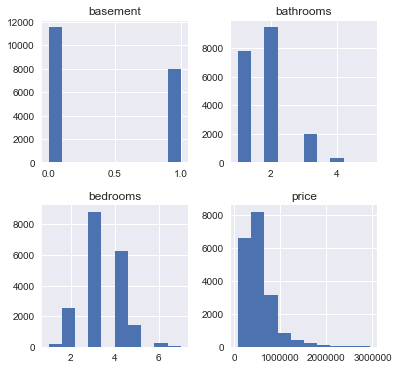

In [169]:
df_sub_feats_bbb = df_sub_feats[['price','bedrooms','bathrooms','basement']]
df_sub_feats_bbb.hist(figsize  = [6, 6]);

It looks like *bathrooms* and *floors* are not normally distributed so let's **min-max scale** them, let's **mean normalize** *bedrooms*, and then we'll see if that makes them better.

C:\Users\Matthew Parker\.conda\envs\learn-env\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


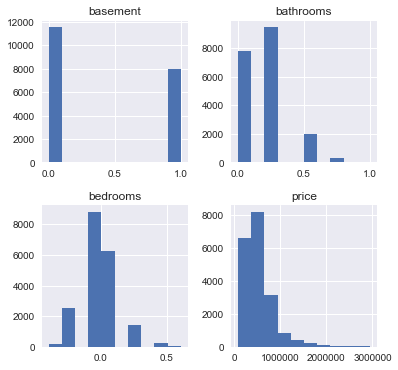

In [171]:
bath = df_sub_feats_bbb.bathrooms
df_sub_feats_bbb.bathrooms = (bath-min(bath))/(max(bath)-min(bath))

beds = df_sub_feats_bbb.bedrooms
df_sub_feats_bbb.bedrooms = (beds-np.mean(beds))/(max(beds)-min(beds))

df_sub_feats_bbb.hist(figsize  = [6, 6]);

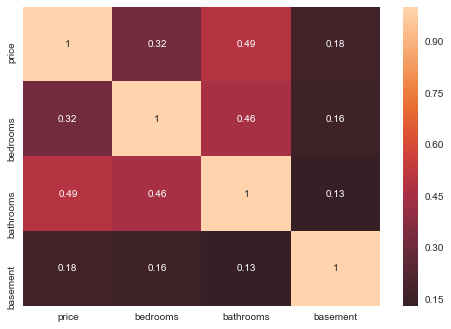

In [172]:
sns.heatmap(df_sub_feats_bbb.corr(), center=0, annot=True);

Well, it seems that *basement* is unrelated to *bedrooms* and *bathrooms*, which makes sense. So we don't have to build a feature around it.

In [173]:
# now to run the function on our small dataset
feature_builder('bathrooms','bedrooms','price',df_sub_feats_bbb)

weight for [ bathrooms ] : weight for [ bedrooms ]
 [0.7618761876187619, 0.23812381238123814]
feature name :  bathrooms_bedrooms_feature


In [176]:
y = df_sub_feats_bbb['price']

x1 = df_sub_feats_bbb[['bedrooms','bathrooms']]
x2 = df_sub_feats_bbb[['bathrooms_bedrooms_feature']]

X1 = sm.add_constant(x1)
X2 = sm.add_constant(x2)

linreg = sm.OLS(y, X1).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     3327.
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        13:25:56   Log-Likelihood:            -2.7299e+05
No. Observations:               19525   AIC:                         5.460e+05
Df Residuals:                   19522   BIC:                         5.460e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.863e+05   3152.883    122.512      0.000     3.8e+05    3.92e+05
bedrooms     2.57e+05   1.56e+04     16.502      0.000    2.27e+05    2.88e+05
bathrooms   8.222e+05    1.3e+04     63.211      0.000    7.97e+05    8.48e+05
==============================================================================
Omnibus:                     8618.612   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61917.137
Skew:                           1.981   Prob(JB):                         0.00
Kurtosis:                      10.773   Cond. No.                         8.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
linreg = sm.OLS(y, X2).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     6294.
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        13:25:58   Log-Likelihood:            -2.7313e+05
No. Observations:               19525   AIC:                         5.463e+05
Df Residuals:                   19523   BIC:                         5.463e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        3.68e+05   2971.800    123.819      0.000    3.62e+05    3.74e+05
bathrooms_bedrooms_feature  9.214e+05   1.16e+04     79.333      0.000    8.99e+05    9.44e+05
==============================================================================
Omnibus:                     8570.086   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60083.339
Skew:                           1.976   Prob(JB):                         0.00
Kurtosis:                      10.631   Cond. No.                         5.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again, all of the relevant scores have improved, so let's move our new feature back into our df_sub_feats DataFrame.

In [178]:
df_sub_feats['bathrooms_bedrooms_feature'] = df_sub_feats_bbb['bathrooms_bedrooms_feature']
df_sub_feats.drop(['bedrooms','bathrooms'], axis=1, inplace=True)

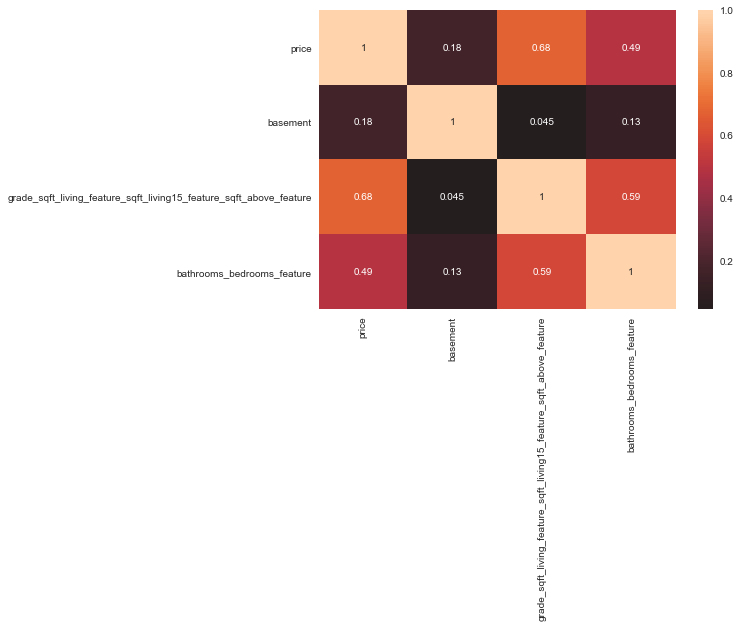

In [179]:
# Re-examing the heatmap again
sns.heatmap(df_sub_feats.corr(), center=0, annot=True);

OK, it looks like we're doing better, though now there's a fair amount of multicollinearity between our two homegrown features. So what should we do about it? 

You guessed it, let's create a **super-feature**!

In [180]:
#the names of these features are ridiculously long. rename them
df_sub_feats.rename(columns={'grade_sqft_living_feature_sqft_living15_feature_sqft_above_feature':'sqft_feature'}, inplace=True)
df_sub_feats.rename(columns={'bathrooms_bedrooms_feature':'rooms_feature'}, inplace=True)

feature_builder('sqft_feature', 'rooms_feature', 'price',df_sub_feats)
df_sub_feats.drop(['sqft_feature', 'rooms_feature'], axis=1, inplace=True)

weight for [ sqft_feature ] : weight for [ rooms_feature ]
 [0.8368836883688369, 0.16311631163116314]
feature name :  sqft_feature_rooms_feature_feature


In [181]:
# the name of this feature has gotten out of hand. rename it
df_sub_feats.rename(columns={'sqft_feature_rooms_feature_feature':'super_feature'}, inplace=True)

In [182]:
y = df_sub_feats['price']

# original variables, untouched
x = df_sub_feats[['super_feature','basement']]

X = sm.add_constant(x)

# modeling and summarizing the first option (original)
linreg = sm.OLS(y, X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     9111.
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        13:27:48   Log-Likelihood:            -2.6942e+05
No. Observations:               19525   AIC:                         5.388e+05
Df Residuals:                   19522   BIC:                         5.389e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           4.97e+05   2216.723    224.226      0.000    4.93e+05    5.01e+05
super_feature  1.547e+06   1.19e+04    130.462      0.000    1.52e+06    1.57e+06
basement       9.995e+04   3467.060     28.827      0.000    9.31e+04    1.07e+05
==============================================================================
Omnibus:                     9151.928   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82622.963
Skew:                           2.046   Prob(JB):                         0.00
Kurtosis:                      12.209   Cond. No.                         7.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

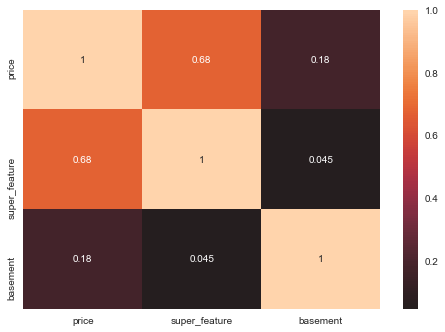

In [183]:
sns.heatmap(df_sub_feats[['price','super_feature','basement']].corr(), center=0, annot=True);

Well, it looks like that's about as good as it's going to get with these techniques.